In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
from scipy import stats

In [3]:
df = pd.read_csv('house.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# Расчет корреляции между GarageArea и GarageCars
correlation, p_value = stats.pearsonr(df['GarageArea'], df['GarageCars'])
print(f"Коэффициент корреляции Пирсона: {correlation:.2f}")
print(f"p-значение: {p_value:.2f}")

Коэффициент корреляции Пирсона: 0.88
p-значение: 0.00


Высокая корреляция: Между размером гаража в квадратных футах (GarageArea) и его вместимостью в количестве автомобилей (GarageCars) наблюдается сильная положительная корреляция (коэффициент Пирсона 0.88). Это указывает на то, что чем больше площадь гаража, тем выше его вместимость.

Статистическая значимость: Полученное p-значение (0.00) свидетельствует о высокой статистической значимости корреляции. Это означает, что связь между GarageArea и GarageCars не является случайной и может быть использована для прогнозирования одной переменной на основе другой.

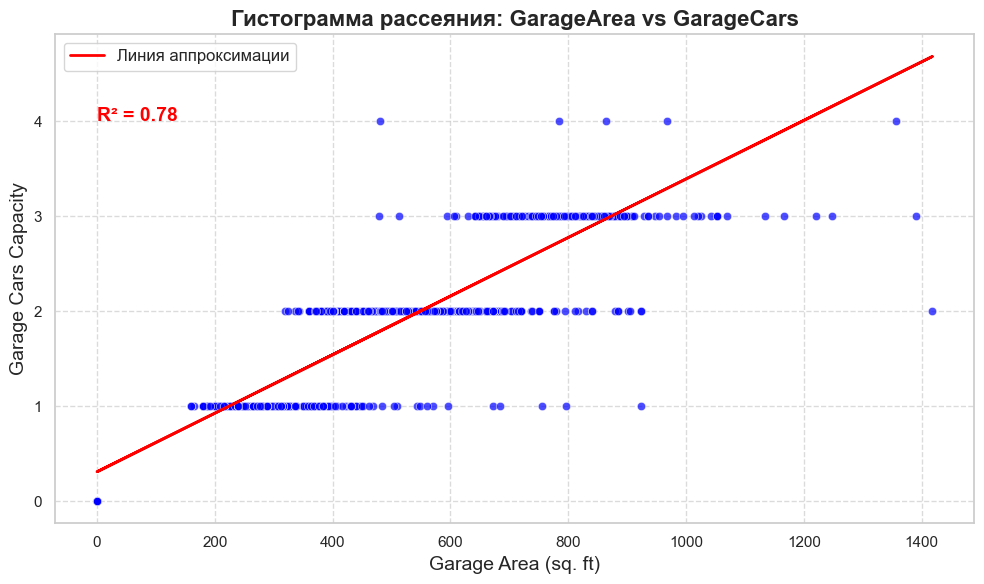

In [5]:
# Построение гистограммы рассеяния
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.scatterplot(x='GarageArea', y='GarageCars', data=df, color='blue', alpha=0.7)
plt.title('Гистограмма рассеяния: GarageArea vs GarageCars', fontsize=16, fontweight='bold')
plt.xlabel('Garage Area (sq. ft)', fontsize=14)
plt.ylabel('Garage Cars Capacity', fontsize=14)

# Добавление линии аппроксимации
X = df[['GarageArea']]
y = df['GarageCars']
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
plt.plot(X, y_pred, color='red', linewidth=2, label='Линия аппроксимации')

# Расчет коэффициента детерминации R^2
r_squared = model.score(X, y)
plt.text(min(X['GarageArea']), max(y), f'R² = {r_squared:.2f}', fontsize=14, color='red', fontweight='bold')

plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

2. Cделать выборку =~ 1/3 наблюдений:

- случайным образом,
- сделать стратифицированную выборку (разбив выборку на группы по смысловому содержанию - Типу дома (HouseStyle)

In [11]:
# Случайная выборка (~1/3 наблюдений)
random_sample = df.sample(frac=1/3, random_state=42)

print("Случайная выборка:")
print(random_sample.head())

Случайная выборка:
        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
892    893          20       RL         70.0     8414   Pave   NaN      Reg   
1105  1106          60       RL         98.0    12256   Pave   NaN      IR1   
413    414          30       RM         56.0     8960   Pave  Grvl      Reg   
522    523          50       RM         50.0     5000   Pave   NaN      Reg   
1036  1037          20       RL         89.0    12898   Pave   NaN      IR1   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
892          Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1105         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
413          Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
522          Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1036         HLS    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCon

In [12]:
# Стратифицированная выборка (~1/3 наблюдений)
stratified_sample = df.groupby('HouseStyle', group_keys=False).apply(lambda x: x.sample(frac=1/3, random_state=42))

print("Стратифицированная выборка:")
print(stratified_sample.head())

Стратифицированная выборка:
        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
165    166         190       RL         62.0    10106   Pave   NaN      Reg   
968    969          50       RM         50.0     5925   Pave   NaN      Reg   
1414  1415          50       RL         64.0    13053   Pave  Pave      Reg   
1076  1077          50       RL         60.0    10800   Pave  Grvl      Reg   
1136  1137          50       RL         80.0     9600   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal  \
165          Lvl    AllPub  ...        0    NaN   NaN         NaN       0   
968          Lvl    AllPub  ...        0    NaN  GdWo         NaN       0   
1414         Bnk    AllPub  ...        0    NaN   NaN         NaN       0   
1076         Lvl    AllPub  ...        0    NaN   NaN        Shed     500   
1136         Lvl    AllPub  ...        0    NaN   NaN         NaN       0   

     MoSold YrSold  SaleType  Sale

In [13]:
# Стратифицированная выборка (~1/3 наблюдений)
stratified_sample = df.groupby('HouseStyle', group_keys=False).apply(lambda x: x.sample(frac=1/3, random_state=42))

print("Стратифицированная выборка:")
print(stratified_sample.head())

Стратифицированная выборка:
        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
165    166         190       RL         62.0    10106   Pave   NaN      Reg   
968    969          50       RM         50.0     5925   Pave   NaN      Reg   
1414  1415          50       RL         64.0    13053   Pave  Pave      Reg   
1076  1077          50       RL         60.0    10800   Pave  Grvl      Reg   
1136  1137          50       RL         80.0     9600   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal  \
165          Lvl    AllPub  ...        0    NaN   NaN         NaN       0   
968          Lvl    AllPub  ...        0    NaN  GdWo         NaN       0   
1414         Bnk    AllPub  ...        0    NaN   NaN         NaN       0   
1076         Lvl    AllPub  ...        0    NaN   NaN        Shed     500   
1136         Lvl    AllPub  ...        0    NaN   NaN         NaN       0   

     MoSold YrSold  SaleType  Sale

3. Посчитать:

- среднее значение по выборкам из п.2 (2.1 случайной и 2.2 стратифицированной),
- доверительный интервал для среднего (на уровне доверия 90%, 95%, 99%).
- - Сравнить среднее генеральной выборки п.2 с полученными в выборках 2.1 и 2.2 и с границами доверительных интервалов из п.3.2.

In [15]:
# Функция для расчета доверительного интервала
def confidence_interval(data, confidence=0.95):
    n = len(data)
    mean = np.mean(data)
    se = stats.sem(data)
    h = se * stats.t.ppf((1 + confidence) / 2., n-1)
    return mean, mean - h, mean + h

# 1. Среднее значение по выборкам
random_sample = df.sample(frac=0.5, random_state=1)
stratified_sample = df.groupby('HouseStyle', group_keys=False).apply(lambda x: x.sample(frac=0.5, random_state=1))

random_mean = random_sample['HouseStyle'].value_counts().mean()
stratified_mean = stratified_sample['HouseStyle'].value_counts().mean()

print(f"Среднее значение случайной выборки: {random_mean:.2f}")
print(f"Среднее значение стратифицированной выборки: {stratified_mean:.2f}")

# 2. Доверительные интервалы для среднего
random_ci_90 = confidence_interval(random_sample['HouseStyle'].value_counts(), confidence=0.90)
random_ci_95 = confidence_interval(random_sample['HouseStyle'].value_counts(), confidence=0.95)
random_ci_99 = confidence_interval(random_sample['HouseStyle'].value_counts(), confidence=0.99)

stratified_ci_90 = confidence_interval(stratified_sample['HouseStyle'].value_counts(), confidence=0.90)
stratified_ci_95 = confidence_interval(stratified_sample['HouseStyle'].value_counts(), confidence=0.95)
stratified_ci_99 = confidence_interval(stratified_sample['HouseStyle'].value_counts(), confidence=0.99)

print("\nДоверительные интервалы для случайной выборки:")
print(f"90%: ({random_ci_90[1]:.2f}, {random_ci_90[2]:.2f})")
print(f"95%: ({random_ci_95[1]:.2f}, {random_ci_95[2]:.2f})")
print(f"99%: ({random_ci_99[1]:.2f}, {random_ci_99[2]:.2f})")

print("\nДоверительные интервалы для стратифицированной выборки:")
print(f"90%: ({stratified_ci_90[1]:.2f}, {stratified_ci_90[2]:.2f})")
print(f"95%: ({stratified_ci_95[1]:.2f}, {stratified_ci_95[2]:.2f})")
print(f"99%: ({stratified_ci_99[1]:.2f}, {stratified_ci_99[2]:.2f})")

# 3. Сравнение среднего генеральной выборки с выборками и границами доверительных интервалов
population_mean = df['HouseStyle'].value_counts().mean()

print(f"\nСреднее значение генеральной выборки: {population_mean:.2f}")

print("\nСравнение среднего генеральной выборки с выборками:")
print(f"Случайная выборка: {population_mean:.2f} {'входит' if random_ci_95[1] <= population_mean <= random_ci_95[2] else 'не входит'} в 95% доверительный интервал")
print(f"Стратифицированная выборка: {population_mean:.2f} {'входит' if stratified_ci_95[1] <= population_mean <= stratified_ci_95[2] else 'не входит'} в 95% доверительный интервал")

Среднее значение случайной выборки: 91.25
Среднее значение стратифицированной выборки: 91.12

Доверительные интервалы для случайной выборки:
90%: (1.21, 181.29)
95%: (-21.13, 203.63)
99%: (-75.06, 257.56)

Доверительные интервалы для стратифицированной выборки:
90%: (2.69, 179.56)
95%: (-19.24, 201.49)
99%: (-72.21, 254.46)

Среднее значение генеральной выборки: 182.50

Сравнение среднего генеральной выборки с выборками:
Случайная выборка: 182.50 входит в 95% доверительный интервал
Стратифицированная выборка: 182.50 входит в 95% доверительный интервал


- Обе выборки (случайная и стратифицированная) достаточно хорошо представляют генеральную совокупность, так как среднее значение генеральной выборки входит в доверительные интервалы обеих выборок.

- Однако, доверительные интервалы включают отрицательные значения, что может быть связано с небольшим размером выборки или ненормальным распределением данных. Для более точных выводов рекомендуется увеличить размер выборки или проверить распределение данных.